# Project: Investigating European Soccer Data
This project is done as part of Udacity/ITIDA Data Analysis Professional Nanodegree.<br>
__Done by__: Khaled Atya<br>
__Date__: 09/11/2021<br>
__Version__: 1.0

## Table of Contents
<ul>
<li><a href="#intro">Chapter 1: Introduction</a></li>
<li><a href="#wrangling">Chapter 2: Data Wrangling</a></li>
<li><a href="#eda">Chapter 3: Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Chapter 4: Conclusions</a></li>
</ul>

<a id='intro'></a>
## Chapter 1: Introduction

> The European Soccer Database contains data about 285 teams from 11 European leagues from season 2008/2009 to 2015/2016. These data contain game results, team attributes, and player attributes. Only game results and team attributes are considered for this analysis.<br>
> 
> The following questions are to be investigated:<br>
> 1. What team has the most wins and what attributes lead to that?<br>
> 2. How did the top winning team perform over the available season range?

### 1.1. Importing Packages.

In [1]:
# Importing pakcages that shall be used.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as pt
from colorama import Fore
%matplotlib inline

### 1.2. Defining functions to be used throughout the analysis phases.

In [2]:
# Creating a function to investigate dataframe properties.
def prop(df, mode):
    """
    Prints data about a selected dataframe depending on the selected mode/s.
    
    Args:
        (str) df - The dataframe variable name to be investigated.
        (int) mode - Select from 1 to 5, using a list for more than one value, to print required info about the dataframe.
                    [1: DATAFRAME HEAD, 2: DATAFRAME INFO, 3: COUNT OF UNIQUE VALUES, 4: COUNT OF DUPLICATED ROWS,_
                      5: COUNT OF DUPLICATED VALUES PER COLUMN]
    """
    if 1 in mode:
        print(Fore.BLUE + 'DATAFRAME HEAD' + Fore.RESET)    
        print(df.head(3))
    if 2 in mode:
        print(Fore.BLUE + 'DATAFRAME INFO' + Fore.RESET)
        print(df.info())
    if 3 in mode:
        print(Fore.BLUE + 'COUNT OF UNIQUE VALUES' + Fore.RESET)
        print(df.nunique())
    if 4 in mode:
        print(Fore.BLUE + 'COUNT OF DUPLICATED ROWS' + Fore.RESET)
        print(df.duplicated().sum())
    if 5 in mode:
        print(Fore.BLUE + 'COUNT OF DUPLICATED VALUES PER COLUMN' + Fore.RESET)
        for column in list(df.columns):
            dup_values = df[column].duplicated().sum()
            if dup_values != 0:
                print('{}: {}'.format(column, dup_values))
        if dup_values.sum() == 0:
            print('All values are unique.')

In [3]:
# Creating a function to investigate team ID's.
def id_check(df, col1, col2, df_check, col_check):
    """
    Checks whether the multiple id's for a single team from df are also available in df_check.
    
    Args:
        (str) df - The dataframe variable name to be investigated.
        (str) col1 - The column of df where long team names are stored.
        (str) Col2 - The column of df where team id's are stored.
        (str) df_check - The dataframe variable name to be checked against df.
        (str) col_check - The column of df_check where team id's are stored.
        
    """
    n = 0
    for id in df[df[col1].duplicated(keep=False)][col2].values:
        n += 1
        if id in df_check[col_check].values:
            print('{}. {} available.'.format(n ,id))
        else:
            print('{}. {} not available'.format(n, id))

<a id='wrangling'></a>
## Chapter 2: Data Wrangling


### 2.1. General Properties

In [4]:
# Loading .csv files.
df_league = pd.read_csv('Database_Soccer/League.csv')
df_team = pd.read_csv('Database_Soccer/Team.csv')
df_attr = pd.read_csv('Database_Soccer/Team_Attributes.csv')
df_match = pd.read_csv('Database_Soccer/Match.csv')

#### 2.1.1. Investigating df_league.
> **Task:** <br>Investigating properties of *df_league*.<br>
> **Results:** <br>There are 11 leagues. No NaN values. No duplicate values or rows. Data types are acceptable. Column names are acceptable.<br>
> **Action:** <br>No cleaning needed for *df_league*.

In [5]:
# Investigating dataframe df_league.
prop(df_league, [1, 2, 3, 4, 5])

DATAFRAME HEAD
     id  country_id                    name
0     1           1  Belgium Jupiler League
1  1729        1729  England Premier League
2  4769        4769          France Ligue 1
DATAFRAME INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes
None
COUNT OF UNIQUE VALUES
id            11
country_id    11
name          11
dtype: int64
COUNT OF DUPLICATED ROWS
0
COUNT OF DUPLICATED VALUES PER COLUMN
All values are unique.


#### 2.1.2. Investigating df_team.
> **Task:** <br>Investigating properties of *df_team*.<br>
> **Results:** <br>There are 296 unique teams. No NaN values except in column 'team_fifa_api_id'. No duplicate rows but there are duplicated values in 3 columns; 'team_fifa_api_id', 'team_long_name', and 'team_short_name'. Data types are acceptable except for column 'team_fifa_api_id'. Column names are acceptable.<br>
> **Action:** <br>Column 'team_api_id' will be used to connect *df_team* with *df_attr* and *df_match* since 'team_fifa_api_id' column has three problems. Column 'team_long_name' will be used instead of column 'team_short_name' because it has less problems and long names are easier to understand than short names.<br>
Further investigation of duplicated 'team_long_name' column values show that there are 3 teams with two different 'team_api_id' values. We  need to take this into consideration while investigating *df_attr* and *df_match*.

In [6]:
# Investigating dataframe df_team.
prop(df_team, [1, 2, 3, 4, 5])

DATAFRAME HEAD
   id  team_api_id  team_fifa_api_id    team_long_name team_short_name
0   1         9987             673.0          KRC Genk             GEN
1   2         9993             675.0      Beerschot AC             BAC
2   3        10000           15005.0  SV Zulte-Waregem             ZUL
DATAFRAME INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
None
COUNT OF UNIQUE VALUES
id                  299
team_api_id         299
team_fifa_api_id    285
team_long_name      296
team_short_name     259
dtype: int64
COUNT OF DUPLICATED ROWS
0
COUNT OF DUPLICATED VALUES PER COLUMN
team_fifa_api_id: 13
team_long_name: 3
team_short_name: 40


In [7]:
# Investigating duplicated values in column team_long_name in dataframe df_league.
df_team[df_team['team_long_name'].duplicated(keep=False)]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
15,16,9996,111560.0,Royal Excel Mouscron,MOU
24,2510,274581,111560.0,Royal Excel Mouscron,MOP
182,31444,8031,111429.0,Polonia Bytom,POB
183,31445,8020,111429.0,Polonia Bytom,GOR
189,31451,8244,301.0,Widzew Łódź,LOD
199,32409,8024,301.0,Widzew Łódź,WID


#### 2.1.3. Investigating df_attr.
> **Task:** <br>Investigating properties of *df_attr*.<br>
> **Results:** <br>No NaN values except in column 'buildUpPlayDribbling'. No duplicate rows. Data types are acceptable except for column 'date'. Column names are non pythonic but will be used as is since adding underscores between the words will make them very long.<br>
> **Action:** <br>Column 'date' will be deleted as it is not needed for our analysis. Column 'buildUpPlayDribbling' to be deleted since the NaN values are 66%! Column 'buildUpPlayDribblingClass' to be deleted as well. Only attribute value columns shall be used in our analysis and the resulting values will be analyzed in terms of the given categories of the attribute class columns. Investigation of the case where 2 ID's are available per few teams show that these 2 ID's also exist in *df_attr*. Hence, both ID's will be used to connect *df_team* with *df_attr* after which the ID's won't be needed since we will use team long names in our analysis instead of id's.

In [8]:
# Investigating dataframe df_attr.
prop(df_attr, [1, 2, 3, 4])

DATAFRAME HEAD
   id  team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
0   1               434         9930  2010-02-22 00:00:00                60   
1   2               434         9930  2014-09-19 00:00:00                52   
2   3               434         9930  2015-09-10 00:00:00                47   

  buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
0              Balanced                   NaN                    Little   
1              Balanced                  48.0                    Normal   
2              Balanced                  41.0                    Normal   

   buildUpPlayPassing buildUpPlayPassingClass           ...             \
0                  50                   Mixed           ...              
1                  56                   Mixed           ...              
2                  54                   Mixed           ...              

  chanceCreationShooting  chanceCreationShootingClass  \
0            

In [9]:
# Checking the case of the 2 different ID's per team spotted previously.
id_check(df_team, 'team_long_name', 'team_api_id', df_attr, 'team_api_id')

1. 9996 available.
2. 274581 available.
3. 8031 available.
4. 8020 available.
5. 8244 available.
6. 8024 available.


#### 2.1.4. Investigating df_match.
> **Task:** <br>Investigating properties of *df_match*.<br>
> **Results:** <br>We are interested in columns from 'league_id' to 'away_team_goal'. No NaN values in our columns of interest. No duplicate rows. Data types are acceptable for our columns of interest.<br>
> **Action:** <br>The columns requried for this analysis are: 'league_id', 'season', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', and 'away_team_goal'. The rest of the columns to be deleted. Based on match result, two new columns, 'home_team_result' and 'away_team_result', to be added to show game result (win, loss, draw) for home and away teams. Investigation of the case where 2 ID's are available per few teams show that these 2 ID's also exist in *df_match*. Hence, both ID's will be used to connect *df_team* with *df_match* after which the ID's won't be needed since we will use team long names in our analysis phase instead of id's.

In [10]:
prop(df_match, [1, 2, 3, 4])

DATAFRAME HEAD
   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...   \
0        492473              9987              9993               1  ...    
1        492474             10000              9994               0  ...    
2        492475              9984              8635               0  ...    

   SJA   VCH   VCD   VCA   GBH   GBD   GBA   BSH   BSD   BSA  
0  4.0  1.65  3.40  4.50  1.78  3.25  4.00  1.73  3.40  4.20  
1  3.8  2.00  3.25  3.25  1.85  3.25  3.75  1.91  3.25  3.60  
2  2.5  2.35  3.25  2.65  2.50  3.20  2.50  2.30  3.20  2.75  

[3 rows x 115 columns]
DATAFRAME INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id

In [11]:
# Checking columns without NaN values.
col_nonan = [x for x in df_match.columns if df_match[x].isnull().any() == False]
print(col_nonan)

['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']


In [12]:
# Checking dtype of columns without NaN values.
['{}: {}'.format(x, df_match[x].dtype) for x in col_nonan]

['id: int64',
 'country_id: int64',
 'league_id: int64',
 'season: object',
 'stage: int64',
 'date: object',
 'match_api_id: int64',
 'home_team_api_id: int64',
 'away_team_api_id: int64',
 'home_team_goal: int64',
 'away_team_goal: int64']

In [13]:
# Checking the case of the 2 different ID's per team spotted previously for home_team_api_id column.
id_check(df_team, 'team_long_name', 'team_api_id', df_match, 'home_team_api_id')

1. 9996 available.
2. 274581 available.
3. 8031 available.
4. 8020 available.
5. 8244 available.
6. 8024 available.


In [14]:
# Checking the case of the 2 different ID's per team spotted previously for away_team_api_id column.
id_check(df_team, 'team_long_name', 'team_api_id', df_match, 'away_team_api_id')

1. 9996 available.
2. 274581 available.
3. 8031 available.
4. 8020 available.
5. 8244 available.
6. 8024 available.


### 2.2. Data Cleaning

#### 2.2.1. Cleaning df_match.
> The cleaning of *df_match* will invovle the following steps:
>> 1. Dropping unrequired columns.<br>
>> 2. Merging the match dataframe with the league and team dataframes.<br>
>> 3. Dropping id columns.<br>
>> 4. Creating two columns: 'home_game_status' and 'away_game_status'.<br>
>> 5. Changing the dataframe to have the following columns: 'league', 'season', 'goal', 'team', and 'game_result'.<br>
>> 6. Creating the following columns: ''win', 'loss', 'draw', and 'games_played'.

In [15]:
# Create a copy from df_match, keep columns of interest, and delete the rest.
df_match_1 = df_match.copy()
col_keep = ['league_id', 'season', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']
df_match_1.drop(df_match_1.columns.difference(col_keep), axis=1, inplace=True)
df_match_1.head(3)

,league_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,2008/2009,9987,9993,1,1
1,1,2008/2009,10000,9994,0,0
2,1,2008/2009,9984,8635,0,3


In [16]:
# Merge df_league with df_match_1
df_match_1.rename(columns={'league_id':'id'}, inplace=True)
df_match_1 = df_match_1.merge(df_league.loc[:,['id','name']], on='id', how='left')
df_match_1.rename(columns={'name':'league'}, inplace=True)
col_league = df_match_1.pop('league')
df_match_1.insert(0, col_league.name, col_league)
df_match_1.head(3)

,league,id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,Belgium Jupiler League,1,2008/2009,9987,9993,1,1
1,Belgium Jupiler League,1,2008/2009,10000,9994,0,0
2,Belgium Jupiler League,1,2008/2009,9984,8635,0,3


In [17]:
# Merge df_team with df_match_2
df_match_2 = df_match_1.copy()
df_match_2 = df_match_2.merge(df_team.loc[:,['team_api_id','team_long_name']], left_on='home_team_api_id', right_on='team_api_id', how='left')
df_match_2.rename(columns={'team_long_name':'home_team'}, inplace=True)
df_match_2.drop('team_api_id', axis=1, inplace=True)
df_match_2 = df_match_2.merge(df_team.loc[:,['team_api_id','team_long_name']], left_on='away_team_api_id', right_on='team_api_id', how='left')
df_match_2.rename(columns={'team_long_name':'away_team'}, inplace=True)
df_match_2.drop('team_api_id', axis=1, inplace=True)
df_match_2.head(3)

,league,id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team,away_team
0,Belgium Jupiler League,1,2008/2009,9987,9993,1,1,KRC Genk,Beerschot AC
1,Belgium Jupiler League,1,2008/2009,10000,9994,0,0,SV Zulte-Waregem,Sporting Lokeren
2,Belgium Jupiler League,1,2008/2009,9984,8635,0,3,KSV Cercle Brugge,RSC Anderlecht


In [18]:
# Delete columns 'id', 'home_team_api_id', and 'away_team_api_id'.
df_match_3 = df_match_2.copy()
df_match_3.drop(['id', 'home_team_api_id', 'away_team_api_id'], axis=1, inplace=True)

df_match_3.head(3)

,league,season,home_team_goal,away_team_goal,home_team,away_team
0,Belgium Jupiler League,2008/2009,1,1,KRC Genk,Beerschot AC
1,Belgium Jupiler League,2008/2009,0,0,SV Zulte-Waregem,Sporting Lokeren
2,Belgium Jupiler League,2008/2009,0,3,KSV Cercle Brugge,RSC Anderlecht


In [19]:
# Create new columns with game result for home team and away team.
conditions_home = [df_match_3['home_team_goal'] > df_match_3['away_team_goal'], df_match_3['home_team_goal'] < df_match_3['away_team_goal']]
conditions_away = [df_match_3['away_team_goal'] > df_match_3['home_team_goal'], df_match_3['away_team_goal'] < df_match_3['home_team_goal']]
choices = ['win', 'loss']
df_match_3['home_game_status'] = np.select(conditions_home, choices, default='draw')
df_match_3['away_game_status'] = np.select(conditions_away, choices, default='draw')
df_match_3.head(3)

,league,season,home_team_goal,away_team_goal,home_team,away_team,home_game_status,away_game_status
0,Belgium Jupiler League,2008/2009,1,1,KRC Genk,Beerschot AC,draw,draw
1,Belgium Jupiler League,2008/2009,0,0,SV Zulte-Waregem,Sporting Lokeren,draw,draw
2,Belgium Jupiler League,2008/2009,0,3,KSV Cercle Brugge,RSC Anderlecht,loss,win


In [20]:
# Change df_match_3 to contain the following columns: 'league', 'season', 'goal', 'team', and 'game_result'.
df_home_team = df_match_3.copy()
df_away_team = df_match_3.copy()
df_home_team.drop(['away_team_goal', 'away_team', 'away_game_status'], axis=1, inplace=True)
df_home_team.rename(columns={'home_team_goal':'goal', 'home_team':'team','home_game_status':'game_result'}, inplace=True)
df_away_team.drop(['home_team_goal', 'home_team', 'home_game_status'], axis=1, inplace=True)
df_away_team.rename(columns={'away_team_goal':'goal', 'away_team':'team','away_game_status':'game_result'}, inplace=True)
df_home_team = df_home_team.append(df_away_team, ignore_index=True)
df_home_team.head()

,league,season,goal,team,game_result
0,Belgium Jupiler League,2008/2009,1,KRC Genk,draw
1,Belgium Jupiler League,2008/2009,0,SV Zulte-Waregem,draw
2,Belgium Jupiler League,2008/2009,0,KSV Cercle Brugge,loss
3,Belgium Jupiler League,2008/2009,5,KAA Gent,win
4,Belgium Jupiler League,2008/2009,1,FCV Dender EH,loss


In [21]:
# Create new columns: 'win', 'loss', 'draw', and 'games_played'.
df_match_4 = df_home_team.copy()
df_match_4['win'] = np.select([df_match_4['game_result'] == 'win'], [1], default=0)
df_match_4['loss'] = np.select([df_match_4['game_result'] == 'loss'], [1], default=0)
df_match_4['draw'] = np.select([df_match_4['game_result'] == 'draw'], [1], default=0)
df_match_4['games_played'] = np.select([df_match_4['game_result'] != ''], [1], default=0)
df_match_4.head()

,league,season,goal,team,game_result,win,loss,draw,games_played
0,Belgium Jupiler League,2008/2009,1,KRC Genk,draw,0,0,1,1
1,Belgium Jupiler League,2008/2009,0,SV Zulte-Waregem,draw,0,0,1,1
2,Belgium Jupiler League,2008/2009,0,KSV Cercle Brugge,loss,0,1,0,1
3,Belgium Jupiler League,2008/2009,5,KAA Gent,win,1,0,0,1
4,Belgium Jupiler League,2008/2009,1,FCV Dender EH,loss,0,1,0,1


#### 2.2.2. Cleaning df_attr.
> The cleaning of df_attr will invovle the following steps:
>> 1. Delete unrequired columns.<br>
>> 2. Merging the attributes dataframe with the team dataframe.<br>
>> 3. Merging the mean of the attributes dataframe with the sum of match results dataframe.<br>
>> 4. Check if NaN values exist and drop the rows with NaN values.

In [22]:
# Delete columns 'id', 'date', 'team_fifa_api_id', 'buildUpPlayDribbling', and 'buildUpPlayDribblingClass'.
df_attr_1 = df_attr.copy()
df_attr_1.drop(['id', 'date', 'team_fifa_api_id', 'buildUpPlayDribbling', 'buildUpPlayDribblingClass'], axis=1, inplace=True)
df_attr_1.head()

,team_api_id,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,60,Balanced,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,9930,52,Balanced,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,9930,47,Balanced,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,8485,70,Fast,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,8485,47,Balanced,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [23]:
# Merge df_team with df_attr_2
df_attr_2 = df_attr_1.copy()
df_attr_2 = df_attr_2.merge(df_team.loc[:,['team_api_id','team_long_name']], on='team_api_id', how='left')
df_attr_2.rename(columns={'team_long_name':'team'}, inplace=True)
df_attr_2.drop('team_api_id', axis=1, inplace=True)

df_attr_2.head(3)

,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team
0,60,Balanced,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau
1,52,Balanced,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau
2,47,Balanced,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau


In [24]:
# Creating df_merged by merging df_match_sum with df_attr_mean.
df_match_sum = df_match_4.copy()
df_match_sum = df_match_sum.groupby(['team'], as_index=False).sum()

df_attr_mean = df_attr_2.copy()
df_attr_mean = df_attr_mean.groupby(['team'], as_index=False).mean()

df_merged = df_match_sum.merge(df_attr_mean, on='team', how='left')
df_merged.head()

,team,goal,win,loss,draw,games_played,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,1. FC Kaiserslautern,72,17,33,18,68,51.166667,51.666667,47.166667,62.000000,59.666667,46.833333,52.833333,55.166667
1,1. FC Köln,226,60,90,54,204,57.333333,61.166667,55.166667,41.666667,59.000000,45.000000,51.166667,60.833333
2,1. FC Nürnberg,193,49,78,43,170,45.333333,47.500000,50.500000,53.000000,59.166667,43.333333,50.500000,44.000000
3,1. FSV Mainz 05,320,88,85,65,238,61.833333,51.500000,53.000000,47.666667,54.500000,52.500000,62.500000,49.666667
4,AC Ajaccio,116,22,52,40,114,60.166667,48.833333,50.333333,40.666667,52.166667,37.833333,50.500000,48.666667


In [45]:
# Check if NaN objects exist in df_merged.
df_merged.isnull().any()

team                      False
goal                      False
win                       False
loss                      False
draw                      False
games_played              False
buildUpPlaySpeed           True
buildUpPlayPassing         True
chanceCreationPassing      True
chanceCreationCrossing     True
chanceCreationShooting     True
defencePressure            True
defenceAggression          True
defenceTeamWidth           True
dtype: bool

In [26]:
# Dropping all rows with NaN values.
df_final = df_merged.dropna(axis=0)
df_final.isnull().any()

team                      False
goal                      False
win                       False
loss                      False
draw                      False
games_played              False
buildUpPlaySpeed          False
buildUpPlayPassing        False
chanceCreationPassing     False
chanceCreationCrossing    False
chanceCreationShooting    False
defencePressure           False
defenceAggression         False
defenceTeamWidth          False
dtype: bool

In [27]:
# Getting number of teams in the df_final.
df_final['team'].count()

285

<a id='eda'></a>
## Chapter 3: Exploratory Data Analysis

> The objective of this section is to explore the cleaned dataframe titled *df_final* to get the name of the team with the most wins over the season range from 2008/2009 to 2015/2016. In addition, the team attributes will be analyzed to understand what top attributes could be associated with winning games. <br>
<br>
> After that, the dataframe titled *df_match_4* will be used to analyze the performance of the top winning team over the available season range identifying the season with the most won games, the season with the least won games, the season with the most lost games, the season with the least lost games, and the best overall season.



### 3.1. What team has the most wins and what attributes lead to that?

> For this question, *df_final* will be sorted by 'win' column in descending order to get the name of the top winning team. Then, the best fit line parameters for "Number of Won Games versus Team Attributes" will be calculated and sorted in descending order to get the top three attributes with the highest slopes. This indicates that these attributes could be hypothesized to have the greatest effect on winning a game. These attributes will be analyzed for the top 3 winning teams and the least 3 winning teams.

> Statistical insights about *df_final* were generated. It is observed that there is a large STD (93.87) for games played with minimum 30 games and maximum 304 games. This indicates that some teams are missing match data. The effect of this is also observed on the games won having a minimum of 3 won games, a maximum of 234 won games, and a large STD (51.49). This is a limitation in the dataset.<br>
<br>
> The team attributes have a small STD with values ranging between 25 to 77 and mean around 50. The values for team attributes are categorized into 3 categorizes (0-33, 34-66, and 67-100). Each category has a different meaning based on the attribute itself. These categorizes shall be used in our conclusion.

In [28]:
# Getting statistics about the df_final.
df_final.describe()

,goal,win,loss,draw,games_played,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,245.343860,67.733333,67.343860,45.982456,181.059649,52.036491,48.687836,51.754561,53.443743,53.875029,45.827193,49.145614,52.016608
std,170.046476,51.487717,32.379152,24.575187,93.872216,7.698257,7.337875,6.602236,7.465445,6.251578,6.973565,6.155644,6.438615
min,21.000000,3.000000,14.000000,4.000000,30.000000,29.333333,30.000000,30.000000,33.333333,36.666667,25.666667,30.000000,30.000000
25%,101.000000,22.000000,40.000000,25.000000,94.000000,47.333333,44.000000,48.000000,49.333333,50.200000,41.333333,45.600000,48.166667
50%,225.000000,60.000000,68.000000,47.000000,190.000000,52.333333,48.400000,51.500000,53.666667,54.000000,46.000000,48.800000,52.400000
75%,359.000000,101.000000,94.000000,66.000000,272.000000,57.333333,53.166667,55.666667,58.500000,58.000000,50.000000,52.833333,55.833333
max,849.000000,234.000000,142.000000,100.000000,304.000000,72.500000,77.000000,68.833333,77.000000,70.000000,70.000000,70.000000,70.000000


> After understanding our data, *df_final* was categorized by 'win' column in descending order to get the top winning team. It was found that FC Barcelona won 234 games from season 2008/2009 to season 2015/2016 making it the team with the most won games.

In [29]:
# Sorting df_final in descending order by column 'win' to get top winning teams.
df_top_win = df_final.sort_values(by='win', ascending=False)
df_top_win.head()

,team,goal,win,loss,draw,games_played,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
75,FC Barcelona,849,234,27,43,304,35.833333,34.000000,45.166667,33.333333,53.000000,64.333333,54.500000,66.500000
211,Real Madrid CF,843,228,40,36,304,50.666667,38.666667,67.500000,53.833333,69.000000,52.000000,52.166667,63.500000
49,Celtic,695,218,36,50,304,61.333333,57.333333,55.666667,60.833333,60.833333,53.333333,54.333333,62.166667
77,FC Bayern Munich,653,193,35,44,272,48.666667,35.166667,38.500000,40.666667,49.666667,57.166667,48.833333,55.166667
162,Manchester United,582,192,55,57,304,51.833333,45.833333,50.000000,63.166667,53.833333,45.000000,48.000000,54.833333


In [30]:
# Creating a variable with the name of the top winning team.
top_win_team_name = df_top_win['team'].head(1).values[0]
print('Top Winning Team is {}.'.format(top_win_team_name))

Top Winning Team is FC Barcelona.


> *df_fianl* was sorted by 'win' column in ascending order to get the least 3 winning teams which their team attributes will be analyzed against the top 3 winning teams. Also, it will be used in plotting.<br>
<br>
> The least 3 winning teams are Córdoba CF, AC Arles-Avignon, and DSC Arminia Bielefeld.

In [31]:
# Sorting df_final in ascending order by column 'win' to get least winning teams.
df_least_win = df_final.sort_values(by='win', ascending=True)
df_least_win.head()

,team,goal,win,loss,draw,games_played,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
56,Córdoba CF,22,3,24,11,38,40.333333,46.333333,41.666667,59.000000,51.166667,36.833333,38.333333,48.666667
5,AC Arles-Avignon,21,3,24,11,38,43.166667,53.166667,46.000000,38.333333,39.500000,38.333333,46.000000,46.333333
57,DSC Arminia Bielefeld,29,4,14,16,34,49.333333,59.333333,48.666667,51.333333,48.000000,39.666667,47.333333,49.333333
78,FC Dordrecht,24,4,22,8,34,39.000000,62.000000,62.000000,66.000000,48.000000,51.000000,58.000000,55.000000
244,SpVgg Greuther Fürth,26,4,21,9,34,59.833333,45.666667,50.666667,51.000000,50.833333,46.666667,52.833333,56.666667


> The slope and y-intercept of the best fit lines for the won games versus each team attribute were calculated and saved in *df_bestfit*. The dataframe was sorted in descending order to get the top 3 team attributes which have the largest slopes. These team attributes are: build up play passing, defence pressure, and chance creation passing with slopes of -0.040327, 0.038546, and 0.022163; respectively.<br>
<br>
> These attributes are categorized as following:
>> **Build Up Play Passing**: (0-33) Short - (34-66) Mixed - (67-100) Long<br>
>> **Defence Pressure**: (0-33) Deep - (34-66) Medium - (67-100) High<br>
>> **Chance Creation Passing**: (0-33) Safe - (34-66) Normal - (67-100) Risky<br>

In [32]:
# Getting the best fit linear line attributes for each team attribute and sorting it in descending order based on abs of m.
columns = df_least_win.columns.difference(['team', 'goal', 'win', 'loss', 'draw', 'games_played']).tolist()
bestfit_m = []
bestfit_b = []
slope_abs = []
bestfit_dict = {}
for col in columns:
    x = np.array(df_least_win['win'].tolist())
    y = np.array(df_least_win[col].tolist())
    m, b = np.polyfit(x, y, 1)
    slope_abs.append(abs(m))
    bestfit_m.append(m)
    bestfit_b.append(b)

bestfit_dict['Attributes'] = columns
bestfit_dict['Slope (Abs)'] = slope_abs
bestfit_dict['m'] = bestfit_m
bestfit_dict['b'] = bestfit_b

df_bestfit = pd.DataFrame(bestfit_dict)
df_bestfit = df_bestfit.sort_values(by='Slope (Abs)', ascending=False)
df_bestfit

,Attributes,Slope (Abs),m,b
0,buildUpPlayPassing,0.040327,-0.040327,51.419303
6,defencePressure,0.038546,0.038546,43.216371
3,chanceCreationPassing,0.022163,0.022163,50.253375
4,chanceCreationShooting,0.019498,0.019498,52.554361
2,chanceCreationCrossing,0.017683,0.017683,52.246036
5,defenceAggression,0.017115,0.017115,47.986357
7,defenceTeamWidth,0.014053,0.014053,51.064764
1,buildUpPlaySpeed,0.007521,0.007521,51.527061


> The best fit lines are plotted for all team attributes to visualize them. Build up play passing team attribute have the largest slope inversly proportional to won games. This means that as teams lean toward playing shorter ball passes between players, their chance of winning the game may increase.<br>
<br>
Defense pressure is the 2nd highest slope team attribute directly proportional to won games. This means that as teams move toward high defense pressure, their chance of winning the game may increase.<br>
<br>
Lastly, chance creation passing is directly proportional with won games indicating that teams who take risky chance creation passing may have higher chance of winning the game.

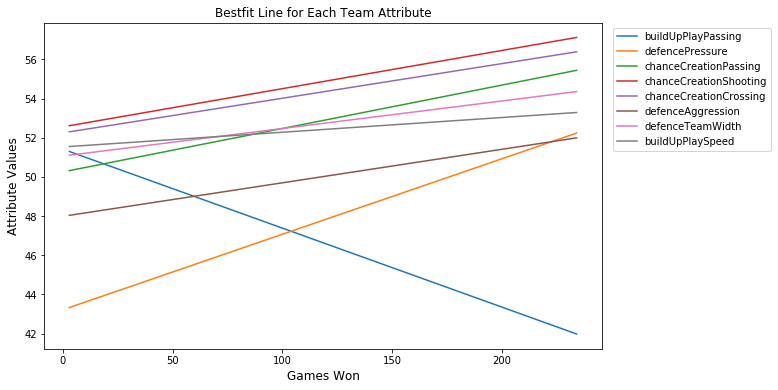

In [33]:
# Plotting the bestfit lines for the team attributes.
x = df_least_win['win']

plt.figure(figsize=(10,6))
plt.title('Bestfit Line for Each Team Attribute', fontdict={'size':12})
plt.xlabel('Games Won', fontdict={'size':12})
plt.ylabel('Attribute Values', fontdict={'size':12})

for m, b, label in zip(df_bestfit['m'], df_bestfit['b'], df_bestfit['Attributes']):
    plt.plot(x, m*x + b, label=label)

plt.legend(bbox_to_anchor=(1.01, 1));

> The top 3 team attributes were plotted for the top 3 winning teams. FC Barcelona has shorter ball passes on average with deep defense pressure and a normal chance creation passing. For Real Madrid CF, build up play passing attribute increases to the mixed style range while their defense pressure decreases toward a medium style compared to FC Barcelona. Their chance ceration passing though increases higher than FC Barcelona to the risky category. The third team has all three attributes in the middle category with short passing, medium defense pressure, and a normal chance creation passing. These observations even though they don't strongly support that these three top team attributes have a direct effect on the chance of winning a game, they show that they may increase the probability of winning a game.

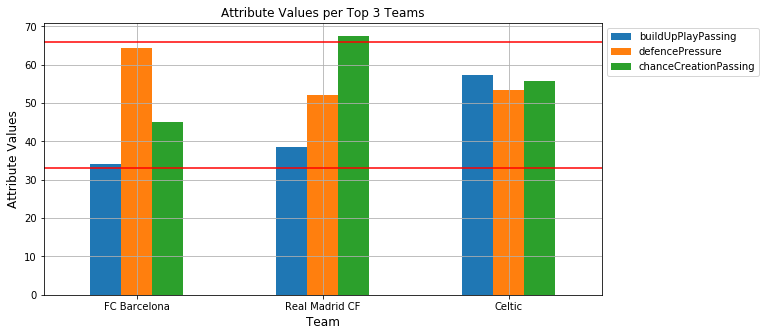

In [34]:
# Ploting top 3 winning teams.
col_plot = df_bestfit['Attributes'].head(3).tolist()
col_plot.append('team')

df_top_plot = df_top_win.loc[:,col_plot].head(3)
df_top_plot.plot(kind='bar', x='team', figsize=(10,5), rot=0)
plt.axhline(y=33, color='r', linestyle='-')
plt.axhline(y=66, color='r', linestyle='-')

plt.title('Attribute Values per Top 3 Teams', fontdict={'size':12})
plt.xlabel('Team', fontdict={'size':12})
plt.ylabel('Attribute Values', fontdict={'size':12})
plt.legend(bbox_to_anchor=(1, 1))
plt.grid();

> The top 3 team attributes were also plotted for the least 3 winning teams. It is observed that the three temas have their top 3 team attributes in non-optimal positions. All 3 teams have mixed build up play passing while defence pressure and chance creation passing are at the lower portion of the middle region. Thus, all 3 team attributes are going against the preferred positions of team attributes. This again show that the status of the top 3 team attributes may indicate the chance of winning or losing a game.

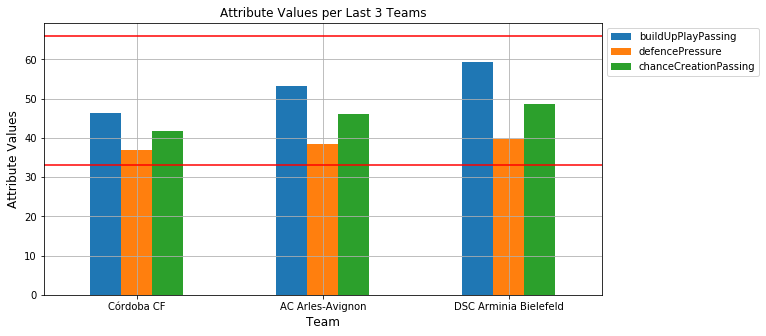

In [35]:
# Ploting least 3 winning teams.
df_least_plot = df_least_win.loc[:,col_plot].head(3)
df_least_plot.plot(kind='bar', x='team', figsize=(10,5), rot=0)
plt.axhline(y=33, color='r', linestyle='-')
plt.axhline(y=66, color='r', linestyle='-')

plt.title('Attribute Values per Last 3 Teams', fontdict={'size':12})
plt.xlabel('Team', fontdict={'size':12})
plt.ylabel('Attribute Values', fontdict={'size':12})
plt.legend(bbox_to_anchor=(1, 1))
plt.grid();

### 3.2. How did the top winning team perform over the available season range?

> To answer this question, *df_match_4* will be used. The dataframe will be filtered to show data for FC Barcelona only. Then, it will be grouped by 'season' column to show the overall results per season. The resulting dataframe will be used to identify the season with the most won games, the season with the least won games, the season with the most lost games, and the season with the least lost games. The best season will be determined by calculating the total points per season; 3 points if the team won, 1 point if the game ended with a draw, and 0 points in case of loss.

In [36]:
# Creating a dataframe with the game results per season for the top winning team.
top_winning_team = df_top_win['team'].head(1).values[0]

df_top_team = df_match_4.query('team == @top_winning_team').copy()
df_top_team = df_top_team.groupby('season', as_index=False).sum()
df_top_team['points'] = df_top_team['win'] * 3 + df_top_team['draw'] * 1
df_top_team

,season,goal,win,loss,draw,games_played,points
0,2008/2009,105,27,5,6,38,87
1,2009/2010,98,31,1,6,38,99
2,2010/2011,95,30,2,6,38,96
3,2011/2012,114,28,3,7,38,91
4,2012/2013,115,32,2,4,38,100
5,2013/2014,100,27,5,6,38,87
6,2014/2015,110,30,4,4,38,94
7,2015/2016,112,29,5,4,38,91


> Statistical insights about *df_top_team* were generated. It is observed that the STDs for goals scored, games won, games lost, and games which ended with a draw are low. This shows that the performance of FC Barcelona was stable from season 2008/2009 to 2015/2016. The mean for games won is approximately 29 games meaning that FC Barcelona on average wins 76% of their games per season.

In [37]:
# Getting statistics about the top winning team.
df_top_team.describe()

,goal,win,loss,draw,games_played,points
count,8.000000,8.000000,8.00000,8.000000,8.0,8.000000
mean,106.125000,29.250000,3.37500,5.375000,38.0,93.125000
std,7.735586,1.832251,1.59799,1.187735,0.0,4.998214
min,95.000000,27.000000,1.00000,4.000000,38.0,87.000000
25%,99.500000,27.750000,2.00000,4.000000,38.0,90.000000
50%,107.500000,29.500000,3.50000,6.000000,38.0,92.500000
75%,112.500000,30.250000,5.00000,6.000000,38.0,96.750000
max,115.000000,32.000000,5.00000,7.000000,38.0,100.000000


> The dataframe is plotted using a bar graph showing visually the performance of FC Barcelona per season. The season with the most won games was in 2012/2013. FC Barcelona won 32 games in this season. The seasons with the least won games were in 2008/2009 and 2013/2014 with 27 games won. The seasons with the most lost games were in 2008/2009, 2013/2014, and 2015/2016 with 5 lost games. Finally, the season with the least lost games was in 2009/2010 with only 1 games lost.

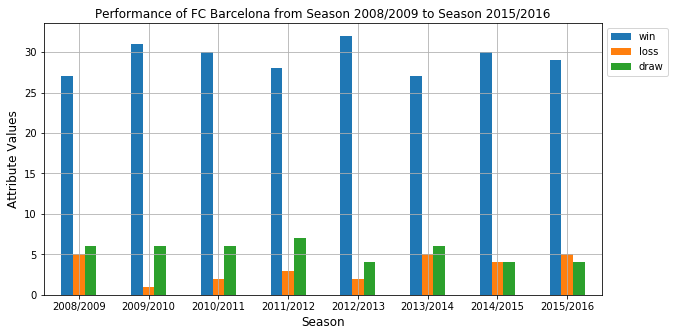

In [38]:
# Plotting the performance of the top winning team over the available season range.
season_start = df_top_team['season'].head(1).values[0]
season_end = df_top_team['season'].tail(1).values[0]
df_top_team.plot(x='season', y=['win', 'loss', 'draw'], kind='bar', figsize=(10,5), rot=0)

plt.title('Performance of {} from Season {} to Season {}'.format(top_win_team_name, season_start, season_end), fontdict={'size':12})
plt.xlabel('Season', fontdict={'size':12})
plt.ylabel('Attribute Values', fontdict={'size':12})
plt.legend(bbox_to_anchor=(1, 1))
plt.grid();

> The overall performance per season was plotted identifying visually the season with the best overall performance. The graph shows that season 2012/2013 was the best season for FC Barcelona scoring 100 points.

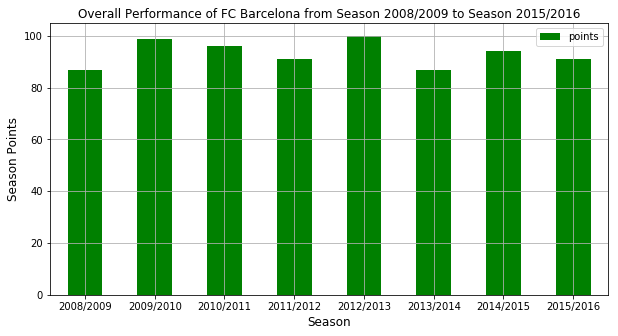

In [39]:
# Plotting the overall performance of the top winning team over the available season range.
df_top_team.plot(x='season', y='points', kind='bar', figsize=(10,5), rot=0, color='g')

plt.title('Overall Performance of {} from Season {} to Season {}'.format(top_win_team_name, season_start, season_end), fontdict={'size':12})
plt.xlabel('Season', fontdict={'size':12})
plt.ylabel('Season Points', fontdict={'size':12})
plt.grid();

> The box plot for *df_top_team* was plotted. It is seen from the plot the top performing season with 100 points in season 2012/2013 and the worst performing seasons with 87 points in 2008/2009 and 2013/2014. The median is at nearly 92.5 points. The plot showed visually that, for the given time period, FC Barcelona scored more than 92 points more frequntly than they scored below 92 points.

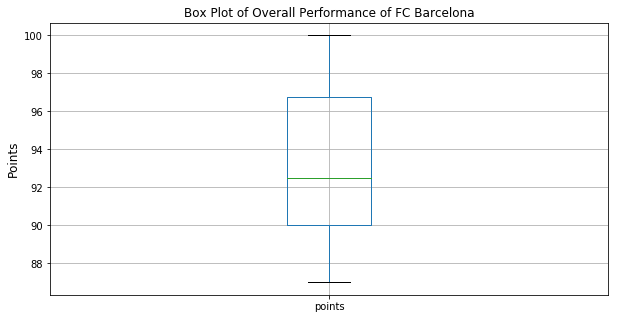

In [40]:
# Plotting box plot of the overall performane of the top winning team.
df_top_team.plot(y='points', kind='box', figsize=(10,5), rot=0)

plt.title('Box Plot of Overall Performance of {}'.format(top_win_team_name), fontdict={'size':12})
plt.ylabel('Points', fontdict={'size':12})
plt.legend(bbox_to_anchor=(1, 1))
plt.grid();

<a id='conclusions'></a>
## Chapter 4: Conclusions
<br>

> The European soccer databse contained data of 285 teams from 11 European leagues from season 2008/2009 to 2015/2016. These data were used to determine the top performing team over this time range and to determine the top attributes which may affect the liklihood of winning a game. Next, the performance of the top winning team from season 2008/2009 to 2015/2016 was analyzed to determine the best and worst overall peformance and the seasons in which the team achieved that.<br>
<br>
> The team with the most won games was FC Barcelona who won 234 games from season 2008/2009 to season 2015/2016. The top 3 team attributes who showed higher change as per the bestfit line to won games are: Build Up Play Passing, Defence Pressure, and Chance Creation Passing. It was hypothesized that the preferable conditions for winning a game are short build up play passing (<34), high defence pressure (>66), and risky chance creation passing (>66). Investigation of these attributes for the top 3 winning teams and the least 3 winning teams showed some evidence that achieving two conditions out of the three preferable may indeed increase the chance of winning a game. Yet, it can not be strongly conlcuded that these attributes lead to winning a game since game conditions such as weather and terrain type may also impact the performance of a team. No game conditions were provided in the dataset. Hence, it is recommended that more research to be made considering data about the game conditions; in addition to, the team attributes to identify the combination of attributes and conditions which may increase the probability of winning a game.<br>
<br>
> FC Barcelona had a stable performance from season 2008/2009 to 2015/2016 indicated by the small STD values. FC Barcelona won on average 76% of their games per season. The best season for FC Barcelona was 2012/2013 with a score of 100 points while the worst performance was in seasons 2008/2009 and 2013/2014 with 87 points. FC Barcelona, from 2008/2009 to 2015/2016, more frequently scored more than 92 points per season than below 92 points.

> There were some limitations in our dataset. These limitations are:
>> 1. No link between Player Attributes file and the rest of the files. Hence, player attributes were omitted during our analysis.<br>
>> 2. Some teams are missing match data showing misleading results for these teams.<br>
>> 3. Some teams with match data are not available in the team attributes file. These teams were deleted from our match data.<br>
>> 4. Team attribute "build up play dribbling" column have 66% missing data so it was omitted from our analysis. Having these data available may have changed our top 3 team attributes.